In [1]:
import srtm
import matplotlib.pyplot as plt
elevation_data = srtm.get_data()

In [2]:
import matplotlib.patheffects as path_effects
def plot_map(mu, var, hills, min=0, ax = None, label=False, contour_interval=10, plot_var=False):
    new = False
    if not ax:
        new = True
        f, ax = plt.subplots(1,1, dpi=300)
    levels = np.arange(min, 1100, contour_interval)

    if plot_var:
        var = ax.imshow(var.reshape(150,150), 
                  extent=[lons.min(), lons.max(), lats.min(), lats.max()], 
                  alpha=0.7, 
                  vmin=0, vmax=12,
                  aspect='auto',
                  cmap='magma', origin='lower')

    
    # np.mod(np.arange(len(levels)),5)!=0
    if not plot_var:
        contour_color = '#ff8959'
        contour_alpha = 0.75
    else:
        contour_color = "#FFFFFF"
        contour_alpha = 0.3
    #if len(levels[levels%50!=0])>0:
    #    CS =ax.contour(lons, lats, (mu.reshape(150,150)), levels[levels%50!=0], linewidths=.5, colors=contour_color, alpha=contour_alpha, zorder=1)
    #if len(levels[levels%50==0])>0:
    #    CS = ax.contour(lons, lats, (mu.reshape(150,150)), levels[levels%50==0], linewidths=1, colors=contour_color, alpha=contour_alpha, zorder=1)
    
    #c_labels = ax.clabel(CS, levels[levels%100==0], fontsize=5, inline=1, fmt="%.0f")


    #for label in c_labels:
    #    label.set_font_properties(ticks_font_small)

        
    
    ax.plot(hills['lon'], hills['lat'], 'o', markerfacecolor='k', markeredgecolor='w', zorder=98, markersize=3)
    
    if new == True or label == True:
        for hill in hills.iterrows():
            text = ax.text(0.0035+hill[1]['lon'], hill[1]['lat']-0.0015, int(hill[1]['height']), 
                           fontsize=4, zorder=99, )#fontdict=thesis.ssp_legend)
            text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='white'),
                               path_effects.Normal()])
            if hill[1]['height'] > 880:
                #print hill[1]['lon'], hill[1]['lat']
                
                text = ax.text(-0.00065+hill[1]['lon'], hill[1]['lat']-0.0003, hill[1]['name'], 
                              fontsize=5, zorder=999, ha="right",)# fontdict=thesis.lato,  
                #text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                #               path_effects.Normal()])
        #plt.colorbar()

    if new:
        ax.set_xlabel("Longitude / deg")
        ax.set_ylabel("Latitude / deg")
        
    #if not new:
    #    ax.set_yticks(ax.get_ytick_labels()[1:-1])

    #if new:
    #    for ax in f.axes:
            #ax.get_yaxis().get_major_formatter()._useMathText=False
            #ax.get_xaxis().get_major_formatter()._useMathText=False
            #for label in ax.get_xticklabels():
            #    label.set_fontproperties(thesis.ticks_font)
            #ax.set_xlabel(ax.get_xlabel(), fontdict=thesis.lato)  
            #ax.xaxis.get_offset_text().set_fontproperties(thesis.ticks_font)
            #for label in ax.get_yticklabels():
            #    label.set_fontproperties(thesis.ticks_font)
            #ax.set_ylabel(ax.get_ylabel(), fontdict=thesis.lato) 
            #ax.yaxis.get_offset_text().set_fontproperties(thesis.ticks_font)

            
            
    if new:
        #thesis.thesisify(f);

        #f.tight_layout()
        return f
    else:
        return ax
#f.savefig("../../figures/gp/arrochar-alps.pdf")

In [3]:
box = (-4.90, 56.20, -4.70, 56.34)

In [4]:
import numpy as np

In [5]:
lats = np.linspace(box[0], box[2], 20)
lons = np.linspace(box[1], box[3], 20)
points = np.transpose([np.tile(lats, len(lons)), np.repeat(lons, len(lats))])
elevations = np.array([elevation_data.get_elevation(lat, lon) for lon, lat in points], dtype=np.float32)

In [6]:
import pandas as pd

/home/daniel/.virtualenvs/IGRlaptop21/sandbox/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [20]:
points.shape[:0]

()

In [22]:
pd.DataFrame({"latitude": points[:,0], "longitude": points[:,1], "elevation": elevations})

,latitude,longitude,elevation
0,-4.900000,56.20,320.0
1,-4.889474,56.20,538.0
2,-4.878947,56.20,711.0
3,-4.868421,56.20,785.0
4,-4.857895,56.20,655.0
...,...,...,...
395,-4.742105,56.34,339.0
396,-4.731579,56.34,226.0
397,-4.721053,56.34,38.0
398,-4.710526,56.34,127.0


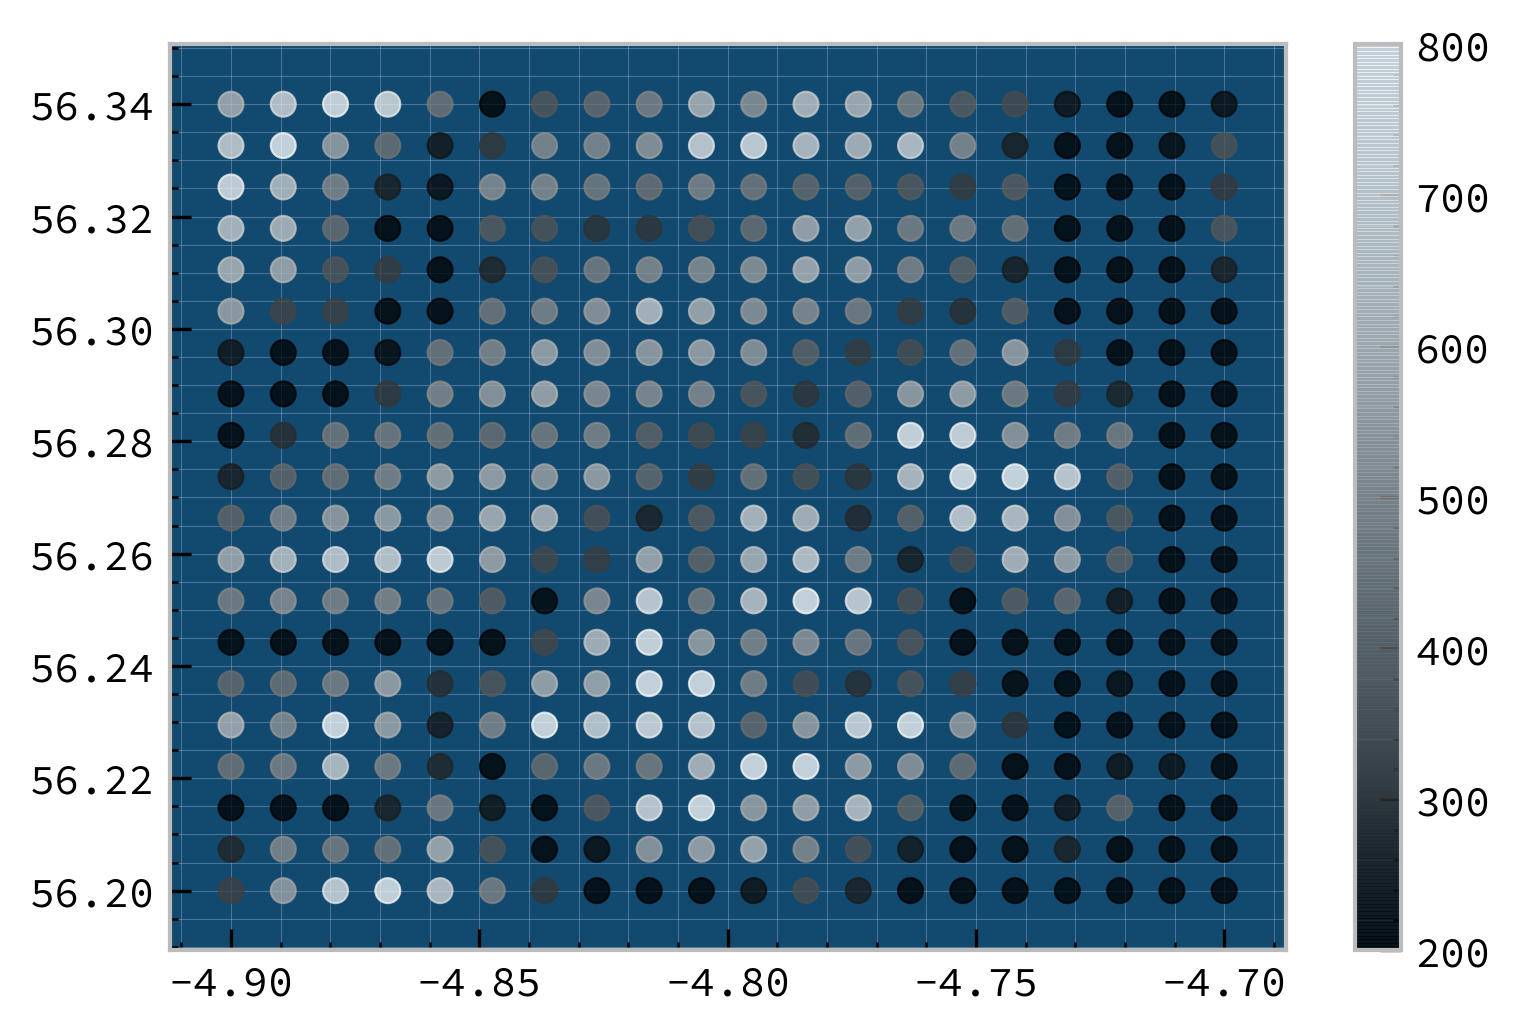

In [120]:
f, ax = plt.subplots(1,1, dpi=300)

sca = ax.scatter(points[:,0], points[:,1], vmax=800, vmin=200, c=elevations, cmap='Greys_r', alpha=0.75) #.reshape(len(lats), len(lons)))
f.colorbar(sca);

In [9]:
import pymc3 as pm

/home/daniel/.virtualenvs/IGRlaptop21/sandbox/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [10]:
elevations[~np.isfinite(elevations)] = 0

In [21]:
with pm.Model() as model:
    
    amp = pm.Normal("amplitude", 1, 1)
    ls = [0.012, 0.012] #
    ls = pm.Normal("metric", mu=[0.012, 0.012], sd=1, shape=2) #pm.Gamma("metric", alpha=3, beta=0.5, shape=2)
    #ls = pm.Gamma("metric", alpha=.03, beta=0.015, shape=2)
    #period = pm.Gamma("period", alpha=1, beta=0.5)
    alpha = pm.Gamma("alpha", alpha=.5, beta=.5, shape=1)
    # Specify the covariance function.
    cov_func = amp * pm.gp.cov.RatQuad(2, ls=ls, alpha=alpha) #+ pm.gp.cov.WhiteNoise(1)

    # Specify the GP.  The default mean function is `Zero`.
    gp = pm.gp.Marginal(cov_func=cov_func)

    # 
    sigma = pm.Normal("sigma", 0.01, 0.001)
    y_ = gp.marginal_likelihood("y", X=points, y=elevations, noise=sigma)

In [17]:
with model:
    mp = pm.find_MAP()

/home/daniel/.virtualenvs/IGRlaptop21/sandbox/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
  0%|          | 0/5000 [00:00<?, ?it/s]/home/daniel/.virtualenvs/IGRlaptop21/sandbox/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
logp = -9.5227e+05, ||grad|| = 2.7304e+09: 100%|██████████| 71/71 [00:15<00:00,  4.68it/s]  


In [24]:
mp['metric'] = np.array([0.01, 0.01])

In [39]:
lons_new = np.linspace(-4.9, -4.70, 150)
lats_new = np.linspace(56.20, 56.35, 150)
points_new = np.transpose([np.tile(lons_new, len(lats_new)), np.repeat(lats_new, len(lons_new))])

In [40]:
with model:
    mu_rq, var_rq = gp.predict(points_new, point=mp, diag=True)
    sd_rq = np.sqrt(var_rq)

/home/daniel/.virtualenvs/IGRlaptop21/sandbox/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


In [63]:
import pandas as pd

In [64]:
hills = pd.read_csv("arrochar.csv")

In [89]:
import plotting
plt.style.use(plotting.blueprint)

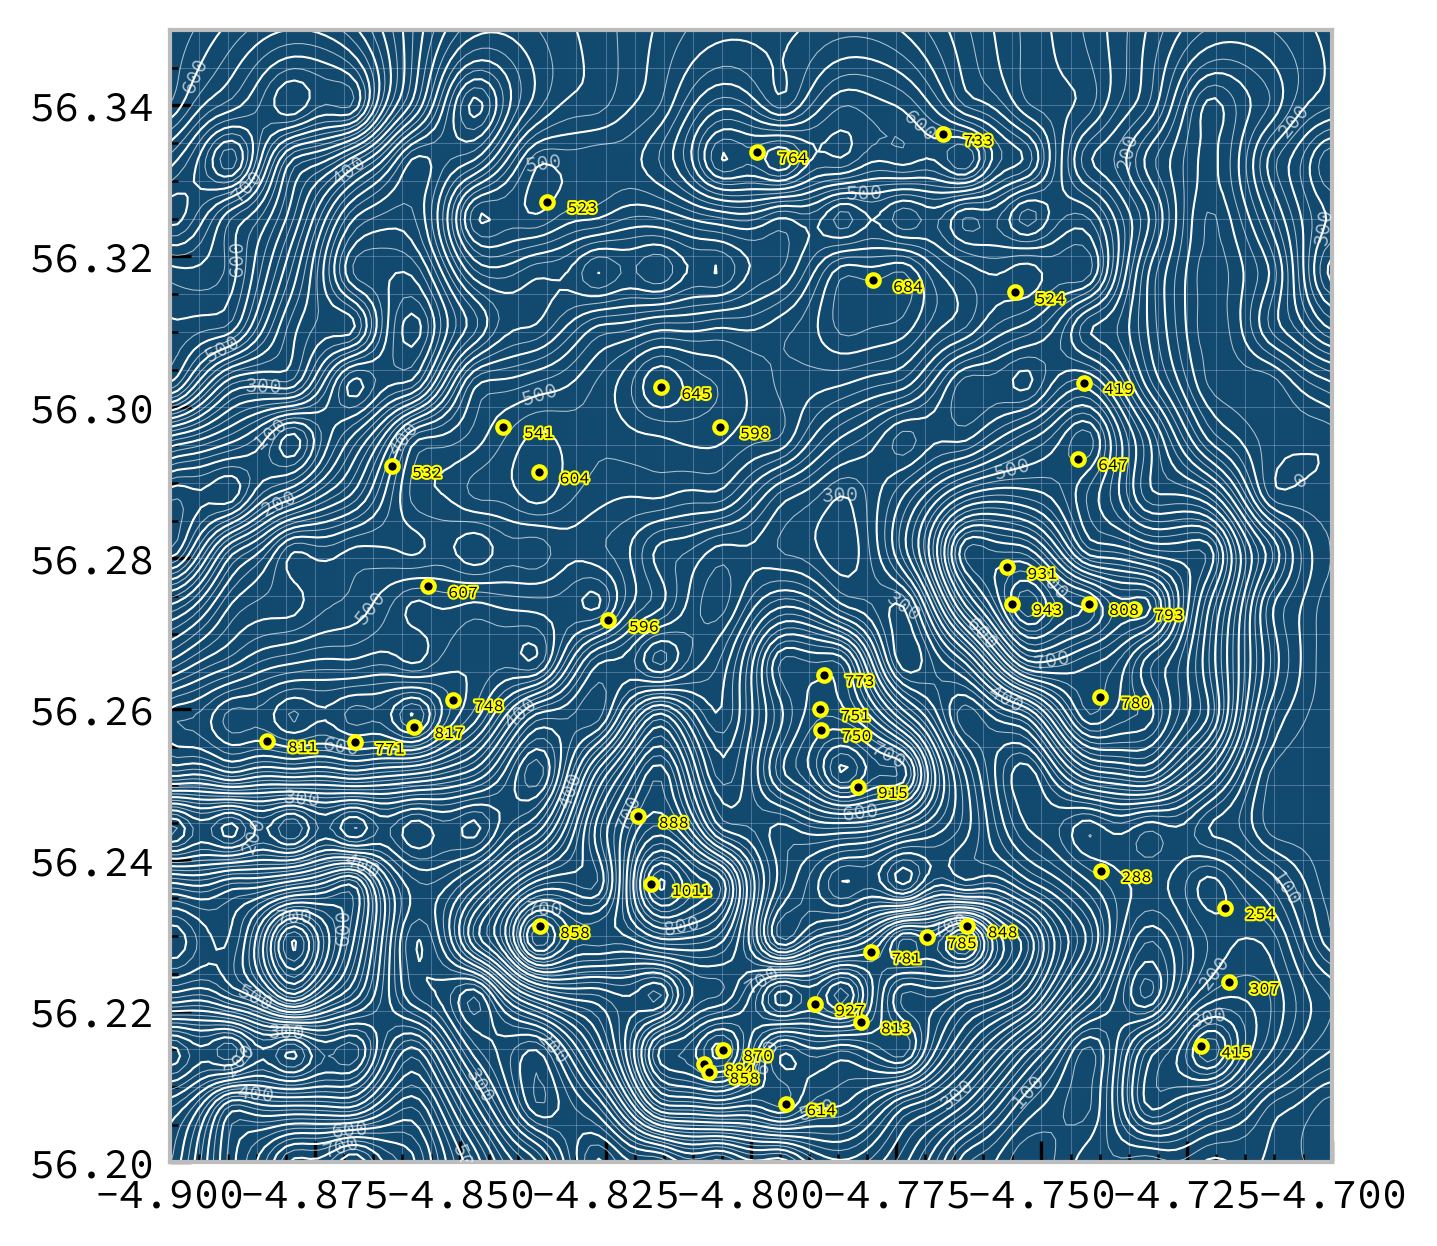

In [121]:
import matplotlib.patheffects as path_effects
f, ax = plt.subplots(1,1, dpi=300, figsize=(5,5))
contour_interval = 25
contour_color = '#ffffffaa'
contour_alpha = 1
levels = np.arange(0, 1100, contour_interval)
CS = ax.contour(lons_new, lats_new, mu_rq.reshape(150,150), levels=levels, colors=contour_color, linewidths=0.25)
c_labels = ax.clabel(CS, levels[levels%100==0], fontsize=5, inline=1, fmt="%.0f")
ax.plot(hills['lon'], hills['lat'], 'o', markerfacecolor='k', markeredgecolor='yellow', zorder=98, markersize=3)
   
if len(levels[levels%100==0])>0:
    CS = ax.contour(lons_new, lats_new, mu_rq.reshape(150,150), levels[levels%50==0], linewidths=.5, colors=contour_color, alpha=contour_alpha, zorder=1)
    
    
for hill in hills.iterrows():
            text = ax.text(0.0035+hill[1]['lon'], hill[1]['lat']-0.0015, int(hill[1]['height']), 
                           fontsize=4, zorder=99, )#fontdict=thesis.ssp_legend)
            text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='yellow'),
                               path_effects.Normal()])
            #if hill[1]['height'] > 880:
                #print hill[1]['lon'], hill[1]['lat']
                
            #    text = ax.text(-0.00065+hill[1]['lon'], hill[1]['lat']-0.0003, hill[1]['name'], 
            #                  fontsize=5, zorder=999, ha="right", color='white')# fontdict=thesis.lato,  
                #text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='white'),
                #               path_effects.Normal()])